In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [3]:
# Importing Data 
Customer = pd.read_csv("Customer Acqusition.csv")
Repayment = pd.read_csv("Repayment.csv")
Spend = pd.read_csv("spend.csv")

In [4]:
Customer.head(3)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt


In [4]:
# Removing Null values from Repayment Data
Repayment = Repayment.iloc[0:1500,0:4]
Repayment.fillna(1.0, inplace=True)

In [11]:
Spend.head(3)

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46


In [5]:
# Converting Date Columns from Repayment and Spend df to Datetype
Spend.Month = pd.to_datetime(Spend.Month, format = '%d-%b-%y')
Repayment.Month = pd.to_datetime(Repayment.Month, format = '%d-%b-%y')

#### 1.a)  In case age is less than 18, replace it with mean of age values.


In [6]:
Customer.Age = np.where((Customer.Age < 18), Customer.Age.mean(), Customer.Age)

In [7]:
# Merging Customer and Spend DataFrame

Customer_Spend = pd.merge(left=Spend, right=Customer, how='left', on='Customer')
Customer_Spend.head(3)

,Sl No:,Customer,Month,Type,Amount,No,Age,City,Product,Limit,Company,Segment
0,1,A1,2004-01-12,JEWELLERY,485470.80,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A1,2004-01-03,PETRO,410556.13,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
2,3,A1,2004-01-15,CLOTHES,23740.46,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed


####  b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. 
#### (customer’s limit provided in acquisition table is the per transaction limit on his card)


In [8]:
Customer_Spend.Amount = np.where((Customer_Spend.Amount > Customer_Spend.Limit), Customer_Spend.Amount/2,Customer_Spend.Amount)
Customer_Spend.head(10)

,Sl No:,Customer,Month,Type,Amount,No,Age,City,Product,Limit,Company,Segment
0,1,A1,2004-01-12,JEWELLERY,485470.80,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A1,2004-01-03,PETRO,410556.13,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
2,3,A1,2004-01-15,CLOTHES,23740.46,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
3,4,A1,2004-01-25,FOOD,484342.47,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
4,5,A1,2005-01-17,CAMERA,369694.07,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
5,6,A1,2005-02-23,SANDALS,168285.60,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
6,7,A1,2005-02-01,CAR,23370.20,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
7,8,A8,2004-02-05,BIKE,77781.29,8,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
8,9,A9,2005-02-28,AUTO,38269.94,9,79.0,CHENNAI,Silver,100003.0,C9,Govt
9,10,A10,2005-02-16,SHOPPING,194795.88,10,54.0,CALCUTTA,Gold,500000.0,C10,Normal Salary


In [9]:
# Renaming SL No column and converting datatype to int64
Repayment.set_axis(['S_No','Customer','Month','Amount'], axis=1, inplace=True)
Repayment.iloc[:,0] = Repayment.iloc[:,0].astype('int64')

In [10]:
# Merging Customer_Spend and Repayment DataFrame
Customer_Spend_Rep = pd.merge(left=Customer_Spend, right=Repayment, how='inner', left_on=['Sl No:', 'Customer'], right_on=['S_No', 'Customer'], suffixes = ('_Spend', '_Rep'))
Customer_Spend_Rep.head()

,Sl No:,Customer,Month_Spend,Type,Amount_Spend,No,Age,City,Product,Limit,Company,Segment,S_No,Month_Rep,Amount_Rep
0,1,A1,2004-01-12,JEWELLERY,485470.80,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,495414.75
1,2,A1,2004-01-03,PETRO,410556.13,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,245899.02
2,3,A1,2004-01-15,CLOTHES,23740.46,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,259490.06
3,4,A1,2004-01-25,FOOD,484342.47,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,437555.12
4,5,A1,2005-01-17,CAMERA,369694.07,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,165972.88


#### c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [13]:
Customer_Spend_Rep.Amount_Rep = np.where((Customer_Spend_Rep.Amount_Rep > Customer_Spend_Rep.Limit), Customer_Spend_Rep.Limit, Customer_Spend_Rep.Amount_Rep)
Customer_Spend_Rep.head(10)

,Sl No:,Customer,Month_Spend,Type,Amount_Spend,No,Age,City,Product,Limit,Company,Segment,S_No,Month_Rep,Amount_Rep
0,1,A1,2004-01-12,JEWELLERY,485470.80,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,495414.75
1,2,A1,2004-01-03,PETRO,410556.13,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,245899.02
2,3,A1,2004-01-15,CLOTHES,23740.46,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,259490.06
3,4,A1,2004-01-25,FOOD,484342.47,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,437555.12
4,5,A1,2005-01-17,CAMERA,369694.07,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,165972.88
5,6,A1,2005-02-23,SANDALS,168285.60,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,6,2005-02-23,365366.62
6,7,A1,2005-02-01,CAR,23370.20,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,7,2005-02-01,14473.41
7,8,A8,2004-02-05,BIKE,77781.29,8,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt,8,2004-02-05,100002.00
8,9,A9,2005-02-28,AUTO,38269.94,9,79.0,CHENNAI,Silver,100003.0,C9,Govt,9,2005-02-28,100003.00
9,10,A10,2005-02-16,SHOPPING,194795.88,10,54.0,CALCUTTA,Gold,500000.0,C10,Normal Salary,10,2005-02-16,48759.19


#### 2. From the above dataset create the following summaries:
#### a. How many distinct customers exist?

In [11]:
print("Nos of Distinct Customers in Dataset is: ",Customer_Spend_Rep.Customer.nunique())

Nos of Distinct Customers in Dataset is:  100


In [25]:
#### b. How many distinct categories exist?

In [12]:
print("Nos of Distinct Segment in Dataset is: ",Customer_Spend_Rep.Segment.nunique())

Nos of Distinct Segment in Dataset is:  5


#### c. What is the average monthly spend by customers?

In [13]:
# Creating 2 Columns with Year and Month name for Spend Date column
Spend['Month_Name'] = Spend.Month.dt.month_name()
Spend['Year_Name'] = Spend.Month.dt.year
Spend.head()


,Sl No:,Customer,Month,Type,Amount,Month_Name,Year_Name
0,1,A1,2004-01-12,JEWELLERY,485470.80,January,2004
1,2,A1,2004-01-03,PETRO,410556.13,January,2004
2,3,A1,2004-01-15,CLOTHES,23740.46,January,2004
3,4,A1,2004-01-25,FOOD,484342.47,January,2004
4,5,A1,2005-01-17,CAMERA,369694.07,January,2005


In [17]:
Spend.groupby(['Year_Name', 'Month_Name'])['Amount'].mean().round(2)

Year_Name  Month_Name
2004       April         235272.04
           February      221215.27
           January       251712.07
           March         232146.12
           May           217539.24
           November      270486.40
           September     310923.38
2005       April         252181.33
           August        233734.63
           December      147503.06
           February      229802.28
           January       292741.37
           July          229116.66
           June          262688.11
           May           245696.52
           November      286143.32
           October       194568.64
           September     188666.20
2006       April         232468.97
           August        240699.72
           December      270470.98
           February      253858.26
           January       282058.01
           July          287505.10
           June          177252.39
           March         247166.08
           May           236162.74
           November      182841.2

#### d. What is the average monthly repayment by customers?

In [14]:
# Creating 2 Columns with Year and Month name for Repayment Date column
Repayment['Month_Name'] = Repayment.Month.dt.month_name()
Repayment['Year_Name'] = Repayment.Month.dt.year
Repayment.head()

,S_No,Customer,Month,Amount,Month_Name,Year_Name
0,1,A1,2004-01-12,495414.75,January,2004
1,2,A1,2004-01-03,245899.02,January,2004
2,3,A1,2004-01-15,259490.06,January,2004
3,4,A1,2004-01-25,437555.12,January,2004
4,5,A1,2005-01-17,165972.88,January,2005


In [19]:
Repayment.groupby(['Month_Name','Year_Name']).Amount.mean().round(2)

Month_Name  Year_Name
April       2004         259141.68
            2005         212688.63
            2006         275472.25
August      2005         264430.92
            2006         224143.99
December    2005         320379.34
            2006         252736.57
February    2004         256702.63
            2005         238829.27
            2006         284489.57
January     2004         243489.65
            2005         240548.10
            2006         293475.39
July        2005         239871.48
            2006         257936.38
June        2005         210199.82
            2006         251990.45
March       2004         252585.28
            2006         240851.27
May         2004         226162.72
            2005         263207.37
            2006         256920.88
November    2004         209592.24
            2005         256695.12
            2006         199399.20
October     2005         219849.96
            2006         260765.48
September   2004         184487.8

In [15]:
Customer_Spend_Rep = pd.merge(left=Customer_Spend, right=Repayment, how='inner', left_on=['Sl No:', 'Customer'], right_on=['S_No', 'Customer'], suffixes = ('_Spend', '_Rep'))
Customer_Spend_Rep

,Sl No:,Customer,Month_Spend,Type,Amount_Spend,No,Age,City,Product,Limit,Company,Segment,S_No,Month_Rep,Amount_Rep,Month_Name,Year_Name
0,1,A1,2004-01-12,JEWELLERY,485470.80,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,495414.75,January,2004
1,2,A1,2004-01-03,PETRO,410556.13,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,245899.02,January,2004
2,3,A1,2004-01-15,CLOTHES,23740.46,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,259490.06,January,2004
3,4,A1,2004-01-25,FOOD,484342.47,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,437555.12,January,2004
4,5,A1,2005-01-17,CAMERA,369694.07,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,165972.88,January,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1496,A67,2006-02-04,BUS TICKET,356872.73,67,54.00,CHENNAI,Gold,500000.0,C29,Normal Salary,1496,2005-05-09,55638.77,May,2005
1496,1497,A68,2006-03-25,BUS TICKET,102485.55,68,46.49,TRIVANDRUM,Silver,100000.0,C30,Self Employed,1497,2006-05-10,319836.49,May,2006
1497,1498,A69,2006-03-31,BUS TICKET,25224.72,69,33.00,CALCUTTA,Platimum,10000.0,C31,Self Employed,1498,2006-07-11,247628.45,July,2006
1498,1499,A70,2006-03-23,BUS TICKET,40296.97,70,46.49,BOMBAY,Platimum,10001.0,C32,Self Employed,1499,2005-08-12,454016.51,August,2005


#### e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?  (Profit is defined as interest earned on #### Monthly Profit. Monthly Profit = Monthly repayment - Monthly spend. Interest is earned only on positive profits and not on 
#### negative amounts)


In [16]:
summ1 = Customer_Spend_Rep.groupby(['Year_Name','Month_Name'])[['Amount_Spend','Amount_Rep']].sum()
summ1['Monthly_Profit'] = summ1.Amount_Rep - summ1.Amount_Spend
summ1['Profit_earned'] = (summ1.Monthly_Profit*2.9/100)
summ1

Amount_Spend   Amount_Rep  Monthly_Profit  Profit_earned
Year_Name Month_Name                                                          
2004      April       5.494102e+06   7774250.37    2.280149e+06   66124.307225
          February    3.705470e+06   6930971.03    3.225501e+06   93539.540020
          January     5.465977e+07  68177101.94    1.351733e+07  392002.500545
          March       3.338004e+06   3788779.21    4.507757e+05   13072.495590
          May         5.302249e+06   5654068.02    3.518189e+05   10202.748680
          November    2.678727e+06   3143883.57    4.651570e+05   13489.553580
          September   2.492998e+06   2951805.58    4.588076e+05   13305.420690
2005      April       5.540260e+06   6380658.94    8.403990e+05   24371.570855
          August      7.494319e+06   9783944.10    2.289625e+06   66399.118040
          December    2.316067e+06   3844552.03    1.528485e+06   44326.076890
          February    2.926447e+07  38690340.95    9.425871e+06  273350.268280
          January     4.055397e+06   6494798.65    2.439402e+06   70742.659450
          July        1.897422e+06   2878457.75    9.810360e+05   28450.045015
          June        6.350930e+06   7567193.46    1.216264e+06   35271.654695
          May         3.177169e+07  40533934.65    8.762240e+06  254104.967395
          November    8.201463e+06  10781195.04    2.579732e+06   74812.229885
          October     1.544644e+06   2638199.48    1.093555e+06   31713.108630
          September   1.833756e+06   2972402.04    1.138646e+06   33020.726460
2006      April       1.747742e+07  24792502.67    7.315083e+06  212137.411640
          August      2.119926e+06   2689727.91    5.698015e+05   16524.242050
          December    2.853334e+06   3032838.83    1.795048e+05    5205.639055
          February    6.468001e+06  11095093.04    4.627092e+06  134185.670610
          January     1.601330e+06   3521704.67    1.920374e+06   55690.851655
          July        5.805279e+06   9543646.18    3.738367e+06  108412.656485
          June        1.564266e+06   3023885.44    1.459619e+06   42328.950275
          March       3.809088e+07  49133658.43    1.104278e+07  320240.663500
          May         1.763368e+07  22352116.99    4.718433e+06  136834.545255
          November    5.111728e+06   5383778.33    2.720499e+05    7889.446955
          October     3.191328e+06   3129185.76   -6.214200e+04   -1802.118000
          September   2.285968e+06   3150406.57    8.644387e+05   25068.723025

#### f. What are the top 5 product types?

In [17]:
# Top 5 Products based on Amount Spend
Spend.groupby('Type')['Amount'].sum().sort_values( ascending=False).head()

Type
PETRO           49863174.09
CAMERA          41481571.96
FOOD            37773338.43
TRAIN TICKET    33067077.15
AIR TICKET      32955445.42
Name: Amount, dtype: float64

#### g. Which city is having maximum spend?

In [18]:
Customer_Spend.groupby('City')['Amount'].sum().sort_values(ascending=False).head(1)

City
COCHIN    58021891.63
Name: Amount, dtype: float64

#### h. Which age group is spending more money?

In [19]:
Customer_Spend['Age_Grp'] = pd.cut(Customer_Spend["Age"],bins=np.arange(18,89,10),labels=["18-28","28-38", "38-48" ,"48-58" ,"58-68","68-78","78-88"],include_lowest=True)
Customer_Spend.groupby('Age_Grp')['Amount'].sum()

Age_Grp
18-28    6.054511e+07
28-38    5.038173e+07
38-48    6.058617e+07
48-58    4.753659e+07
58-68    2.742539e+07
68-78    3.380845e+07
78-88    1.861449e+06
Name: Amount, dtype: float64

#### i. Who are the top 10 customers in terms of repayment?

In [20]:
Repayment.groupby('Customer')['Amount'].sum().sort_values(ascending = False).head(10)

Customer
A61    10539142.91
A60     9876290.74
A13     9572000.66
A22     9372561.68
A21     9056336.15
A43     8489871.46
A45     8448334.87
A12     8334760.16
A48     8292416.75
A14     7943268.63
Name: Amount, dtype: float64

In [21]:
cust_spend = pd.merge(left=Spend, right=Customer, how='left', on='Customer')
cust_spend.head(3)

,Sl No:,Customer,Month,Type,Amount,Month_Name,Year_Name,No,Age,City,Product,Limit,Company,Segment
0,1,A1,2004-01-12,JEWELLERY,485470.80,January,2004,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A1,2004-01-03,PETRO,410556.13,January,2004,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
2,3,A1,2004-01-15,CLOTHES,23740.46,January,2004,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed


#### 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same

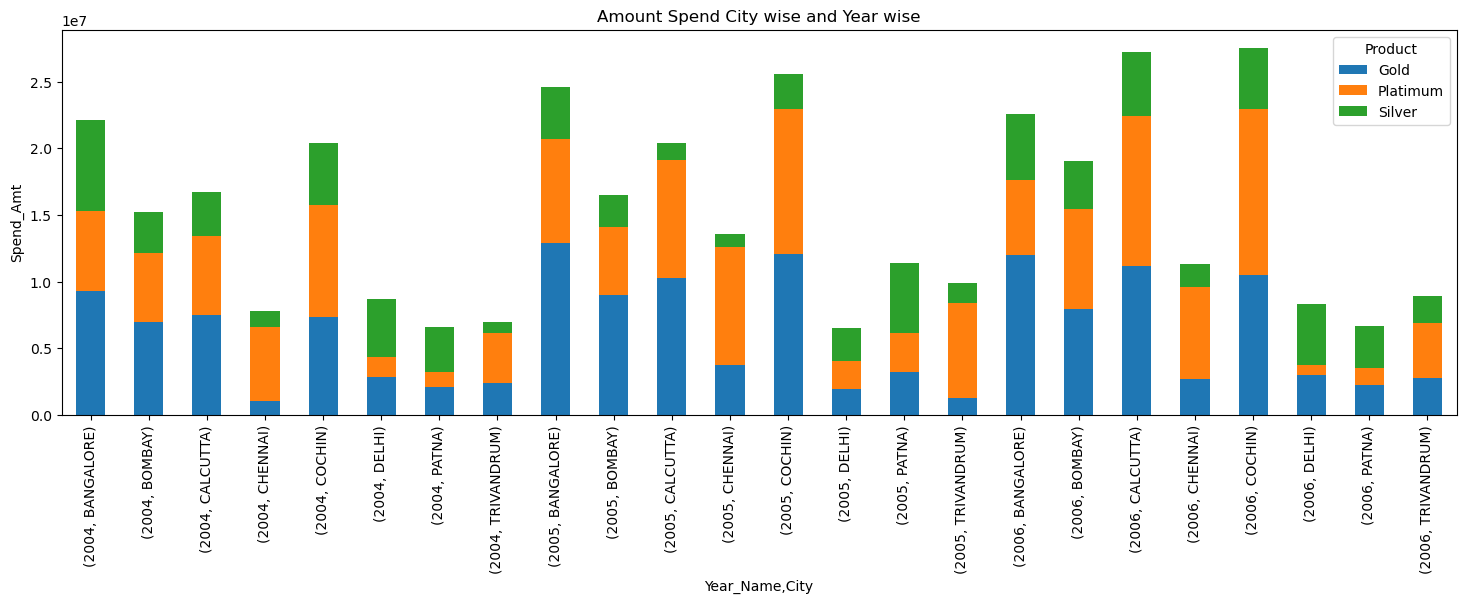

In [25]:
cust_spend_summ = pd.crosstab(index=[cust_spend.Year_Name,cust_spend.City],columns=cust_spend.Product, values=cust_spend.Amount, aggfunc=sum)
cust_spend_summ.plot(kind='bar',figsize = (18,5), stacked = True)
plt.title("Amount Spend City wise and Year wise")
plt.ylabel("Spend_Amt")
plt.show()

#### a. Monthly comparison of total spends, city wise

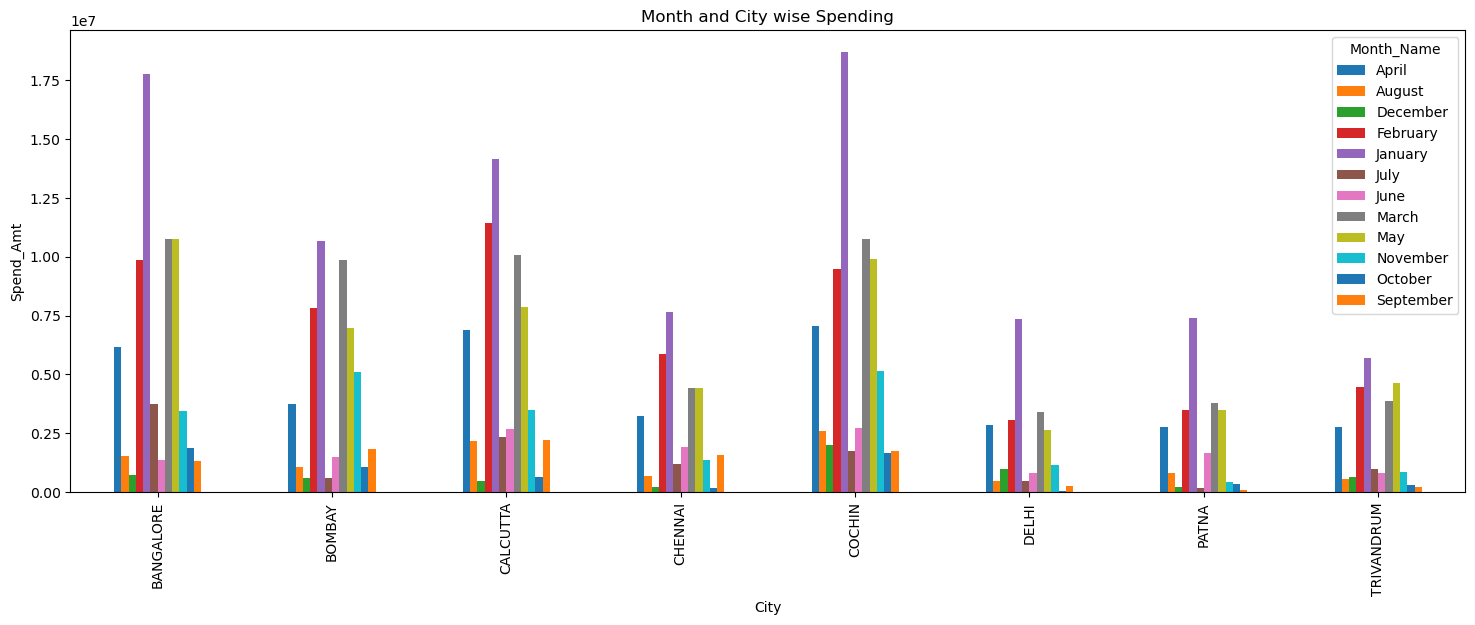

In [46]:
cust_spend.pivot_table(index='City',columns='Month_Name', values='Amount', aggfunc=sum).plot(kind='bar', figsize = (18,6))
plt.title("Month and City wise Spending")
plt.ylabel('Spend_Amt')
plt.show()

#### b. Comparison of yearly spend on air tickets

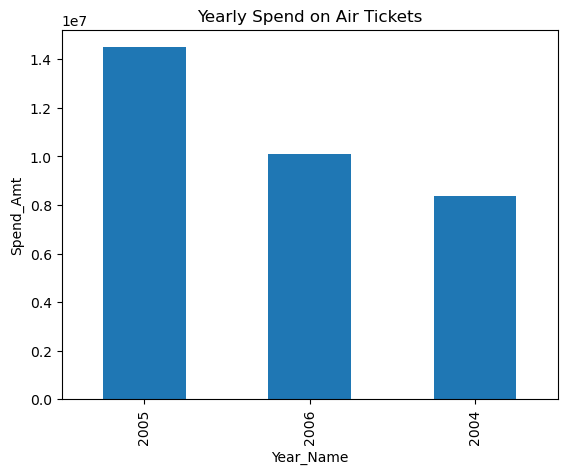

In [47]:
cust_spend_air = cust_spend[cust_spend.Type == 'AIR TICKET']
cust_spend_air.groupby('Year_Name')['Amount'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title("Yearly Spend on Air Tickets")
plt.ylabel("Spend_Amt")
plt.show()

#### c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

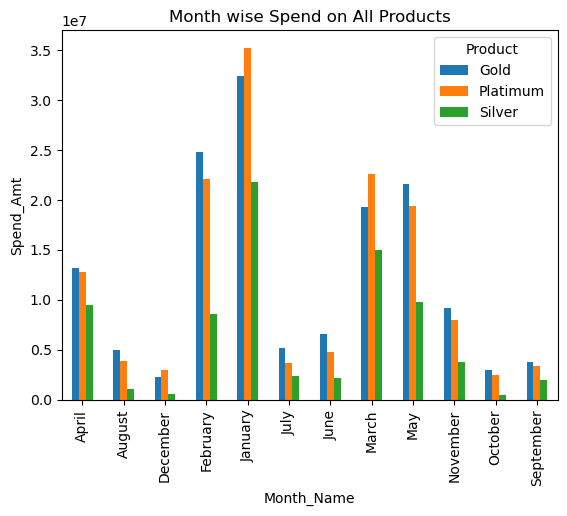

In [49]:
cust_spend.pivot_table(index='Month_Name', columns='Product',values='Amount', aggfunc=sum ).plot(kind='bar')
plt.title("Month wise Spend on All Products")
plt.ylabel("Spend_Amt")
plt.show()

In [23]:
cust_repay = pd.merge(left=Repayment, right=Customer, how='left', on='Customer')
cust_repay.head(3)

,S_No,Customer,Month,Amount,Month_Name,Year_Name,No,Age,City,Product,Limit,Company,Segment
0,1,A1,2004-01-12,495414.75,January,2004,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A1,2004-01-03,245899.02,January,2004,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
2,3,A1,2004-01-15,259490.06,January,2004,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed


In [29]:
# Correcting Platinum spelling in Dataframe
cust_repay.Product = cust_repay.Product.str.replace('Platimum', 'Platinum')
cust_repay.Product.value_counts()

Gold        610
Platinum    570
Silver      320
Name: Product, dtype: int64

In [30]:
def user_report(product , time_period):
    if time_period=='Monthly':
        result = cust_repay.loc[(cust_repay.Product==product)].pivot_table(index=['Product','City','Customer'],columns='Month_Name', values='Amount',aggfunc=sum)
    elif time_period=='Yearly':
        result = cust_repay.loc[(cust_repay.Product==product)].pivot_table(index=['Product','City','Customer'],columns='Year_Name', values='Amount',aggfunc=sum)
    return result
product = input("Please Enter product cat and should be Gold/Silver/Platinum:")
time_period = input("Please Enter time period and should be Monthly/Yearly:")
user_report(product , time_period)

Please Enter product cat and should be Gold/Silver/Platinum:Platinum
Please Enter time period and should be Monthly/Yearly:Yearly


Year_Name                           2004        2005        2006
Product  City       Customer                                    
Platinum BANGALORE  A19        791528.29  1513239.91  1693601.61
                    A37       1702553.35  2835156.31  2998095.17
                    A5        1126386.11  1165614.90   748485.94
                    A52        673659.66  1664637.43  2156791.24
         BOMBAY     A33        453268.40  1360020.56  2990384.18
                    A36       1993579.00  2241604.67  3339582.21
                    A4         572463.32   926469.89  1006923.49
                    A51       1269039.52   873753.76  1593784.33
                    A70              NaN   781655.88         NaN
                    A71         56286.33    30997.74         NaN
         CALCUTTA   A20       1782930.85  1279726.57  1774296.08
                    A34         81344.52   801635.92  1317391.60
                    A40       2576916.73  2527720.55  1886111.99
                    A49       2120489.37  2662210.34  2124415.65
                    A69              NaN   140533.08   247628.45
                    A98        337815.57         NaN         NaN
                    A99         25682.73         NaN         NaN
         CHENNAI    A38       1951311.01  2408626.65  3111018.69
                    A47       1316835.47  3806037.49  2164004.00
                    A56         36537.90   966666.69  3295868.87
         COCHIN     A21       3149664.32  3667493.35  2239178.48
                    A3         645514.26  1382467.49   602551.08
                    A35         31811.80  1262621.90  1912723.97
                    A41       1752953.17  2486187.34  1241458.03
                    A50        722687.58   895335.39  2571945.60
                    A54        490081.00  1829813.48  3255687.64
                    A83              NaN         NaN   132844.13
         DELHI      A53       1265684.82  2278541.47  1261884.91
         PATNA      A55        335081.18   708035.12  2874384.90
         TRIVANDRUM A39       1342503.16  3699578.97  2580401.17
                    A48       1915848.83  3087667.17  3288900.75
                    A97        121874.90         NaN         NaN